
# **Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preparation**

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
clean_df = df.drop(columns='Person ID', axis=1)

In [5]:
clean_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
clean_df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [8]:
clean_df.shape

(374, 12)

In [9]:
#pengolahan data sesuai jenis
Categorical_Col = []
Numerical_Col = []

In [10]:
for col in clean_df.columns:
    if clean_df[col].dtype == 'object':
        Categorical_Col.append(col)

    else:
        Numerical_Col.append(col)

In [11]:
Categorical_Col

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [12]:
Numerical_Col

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

# **Encoding**

In [13]:
#Import Library dan Inisialisasi LabelEncoder:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [14]:
#Encoding Data Kategorikal untuk mengubah data string ke float
for col in Categorical_Col:
    clean_df[col] = LE.fit_transform(clean_df[col])

In [15]:
#Menampilkan 10 Baris Pertama dari DataFrame yang Sudah Diencode
clean_df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,1,28,6,5.9,4,30,8,2,22,85,3000,2
5,1,28,9,5.9,4,30,8,2,22,85,3000,0
6,1,29,10,6.3,6,40,7,2,22,82,3500,0
7,1,29,1,7.8,7,75,6,0,6,70,8000,1
8,1,29,1,7.8,7,75,6,0,6,70,8000,1
9,1,29,1,7.8,7,75,6,0,6,70,8000,1


Data Visualization

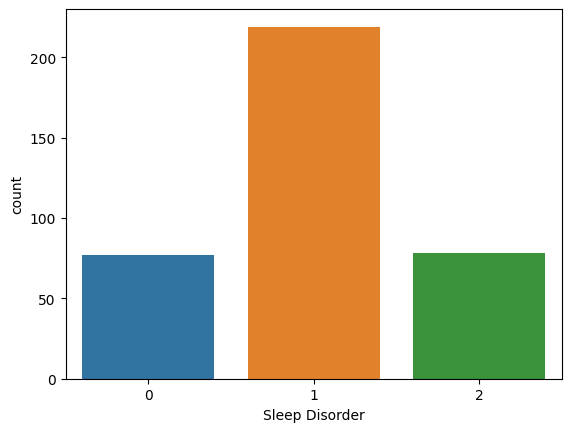

In [16]:
#Visualisasi Jumlah Sampel pada Setiap Kelas Kategori Sleep Disorder
sns.countplot(data=clean_df, x='Sleep Disorder')
plt.show()

Pembagian Data menjadi Data Latih dan Data Uji:

In [17]:
from sklearn.model_selection import train_test_split
X = clean_df.iloc[:,:-1]
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,2,22,85,3000
4,1,28,6,5.9,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,23,68,7000
370,0,59,5,8.0,9,75,3,3,23,68,7000
371,0,59,5,8.1,9,75,3,3,23,68,7000
372,0,59,5,8.1,9,75,3,3,23,68,7000


In [18]:
y = clean_df['Sleep Disorder']
y.head(10)

0    1
1    1
2    1
3    2
4    2
5    0
6    0
7    1
8    1
9    1
Name: Sleep Disorder, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Prediksi dan Evaluasi Model**

Decission Tree

In [20]:
#Pembuatan Model Decision Tree Classifier dan Pelatihan Model:
from sklearn.tree import DecisionTreeClassifier

# pembuatan objek DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Latih ulang model DecisionTreeClassifier dengan fitur dan target yang sama
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:
predict = dt.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
print(f"Hasil Akurasi Decission Tree : {accuracy_score(y_test, predict)}")

Hasil Akurasi Decission Tree : 0.9042553191489362


In [24]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.96      0.98      0.97        55
           2       0.89      0.77      0.83        22

    accuracy                           0.90        94
   macro avg       0.87      0.86      0.86        94
weighted avg       0.91      0.90      0.90        94



KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pembuatan objek KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Misalnya, kita gunakan K=5 neighbors

# Melatih model KNeighborsClassifier dengan fitur dan target yang sama
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [26]:
# Lakukan prediksi dengan model yang telah dilatih
predict_knn = knn.predict(X_test)

In [27]:
print(f"Hasil Akurasi KNN: {accuracy_score(y_test, predict_knn)}")

Hasil Akurasi KNN: 0.8829787234042553


In [28]:
# Menghitung dan mencetak hasil evaluasi
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.96      0.96      0.96        55
           2       0.94      0.68      0.79        22

    accuracy                           0.88        94
   macro avg       0.85      0.84      0.83        94
weighted avg       0.90      0.88      0.88        94



Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membuat objek Random Forest Classifier dengan jumlah pohon (n_estimators) misalnya 100
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model Random Forest Classifier dengan fitur dan target yang sama
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [30]:
# Lakukan prediksi dengan model yang telah dilatih
predict_rf = rf.predict(X_test)

In [31]:
print(f"Hasil Akurasi Random Forest: {accuracy_score(y_test, predict_rf)}")

Hasil Akurasi Random Forest: 0.8936170212765957


In [32]:
# Menghitung dan mencetak hasil evaluasi
print(classification_report(y_test, predict_rf))


              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.96      0.98      0.97        55
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



# **Implementasi**

In [33]:
# Mendefinisikan fungsi untuk menampilkan hasil prediksi sesuai dengan kategori yang ditentukan
def get_sleep_condition(prediction):
    if prediction == 0 :
        return "Insomnia, Solusi : Atur jadwal tidur yang konsisten, Hindari tidur siang terlalu lama, Pastikan kamar tidur gelap, sejuk, dan tenang, Gunakan kasur dan bantal yang nyaman, Batasi konsumsi kafein dan alkohol"
    elif prediction == 1 :
        return "Tidak ada gangguan tidur"
    elif prediction == 2 :
        return "Sleep Apnea, Solusi : Tidur dengan posisi miring, Hindari konsumsi alkohol dan merokok, Menurunkan berat badan"
    else:
        return "Kategori tidak dikenali"
#inputan data
new_data_sample = {
    'Gender' : 1,
    'Age': 28,
    'Occupation' : 6,
    'Sleep Duration': 5.9,
    'Quality of Sleep': 4,
    'Physical Activity Level': 30,
    'Stress Level': 8,
    'BMI Category': 2,
    'Blood Pressure' : 22,
    'Heart Rate': 85,
    'Daily Steps': 3000,
    }

new_data = pd.DataFrame([new_data_sample])
predicted_sleep_disorder = dt.predict(new_data)

# Menampilkan hasil prediksi berdasarkan kategori yang telah ditentukan
predicted_condition = get_sleep_condition(predicted_sleep_disorder[0])
print(f"Hasil Prediksi Gangguan Tidur: {predicted_condition}")


Hasil Prediksi Gangguan Tidur: Sleep Apnea, Solusi : Tidur dengan posisi miring, Hindari konsumsi alkohol dan merokok, Menurunkan berat badan
